1. Importing Everything Required

In [1]:
import pandas as pd
import pandas_profiling as pp
import math
import numpy as np
from sklearn import preprocessing  
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import f1_score
label_encoder = preprocessing.LabelEncoder()

import lightgbm as lgb 


C:\Users\girid\AppData\Roaming\Python\Python36\site-packages\numpy\core\__init__.py:29: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\girid\AppData\Roaming\Python\Python36\site-packages\numpy\.libs\libopenblas.IPBC74C7KURV7CB2PKT5Z5FNR3SIBV4J.gfortran-win_amd64.dll
C:\Users\girid\AppData\Roaming\Python\Python36\site-packages\numpy\.libs\old_libopenblas.CSRRD7HKRKC3T3YXA7VY7TAZGLSWDKW6.gfortran-win_amd64.dll
  stacklevel=1)


EDA AND PREPROCESSING
1. The train and test files are read
2. In the train dataframe, the value counts indicate that y = 'yes' is only about 11%
3. Neither of the two dataframes have NaN values
4. The two dataframes are concatenated and cleaned using label encoding. In the 'y' column, 'yes' = 2, 'no' = 1. In the train dataframe, 'y' = -1 is added, which later becomes 0 after label encoding.
5. pandas profiling is done on the main dataframe.

In [2]:
fpath = 'G:/Personal/Giri/Training/Data Science/Projects/MIT/FD/'
dirtytrain = pd.read_csv(fpath+'train.csv')
dirtytrain['type'] = 1
a = dirtytrain.y.value_counts()[1]
b = dirtytrain.y.value_counts()[0]
#for col in dirtytrain.columns[0: ]:
    #if dirtytrain[col].dtypes == 'O':
        #dirtytrain[col]= label_encoder.fit_transform(dirtytrain[col]) 
dirtytrain['y']=np.where(dirtytrain['y']=='yes',1,0)
dirtytrain['y']=dirtytrain['y'].astype(int)
dirtytrain

,id,age,job,marital,education,default,housing,loan,contact,month,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,type
0,0,56,housemaid,married,basic.4y,no,no,no,telephone,may,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,1
1,1,57,services,married,high.school,unknown,no,no,telephone,may,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,1
2,2,37,services,married,high.school,no,yes,no,telephone,may,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,1
3,4,56,services,married,high.school,no,no,yes,telephone,may,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,1
4,5,45,services,married,basic.9y,unknown,no,no,telephone,may,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,1
5,7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,1
6,8,24,technician,single,professional.course,no,yes,no,telephone,may,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,1
7,9,25,services,single,high.school,no,yes,no,telephone,may,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,1
8,12,29,blue-collar,single,high.school,no,no,yes,telephone,may,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,1
9,14,35,blue-collar,married,basic.6y,no,yes,no,telephone,may,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,1


In [3]:
dirtytrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32978 entries, 0 to 32977
Data columns (total 23 columns):
id                32978 non-null int64
age               32978 non-null int64
job               32978 non-null object
marital           32978 non-null object
education         32978 non-null object
default           32978 non-null object
housing           32978 non-null object
loan              32978 non-null object
contact           32978 non-null object
month             32978 non-null object
day_of_week       32978 non-null object
duration          32978 non-null int64
campaign          32978 non-null int64
pdays             32978 non-null int64
previous          32978 non-null int64
poutcome          32978 non-null object
emp.var.rate      32978 non-null float64
cons.price.idx    32978 non-null float64
cons.conf.idx     32978 non-null float64
euribor3m         32978 non-null float64
nr.employed       32978 non-null float64
y                 32978 non-null int32
type         

In [4]:

dirtytest = pd.read_csv(fpath+'test.csv')
dirtytest['type'] = 0
dirtytest['y'] = '-1'
dirtytest['y'] = dirtytest['y'].astype(int)
dirtytest.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8210 entries, 0 to 8209
Data columns (total 23 columns):
id                8210 non-null int64
age               8210 non-null int64
job               8210 non-null object
marital           8210 non-null object
education         8210 non-null object
default           8210 non-null object
housing           8210 non-null object
loan              8210 non-null object
contact           8210 non-null object
month             8210 non-null object
day_of_week       8210 non-null object
duration          8210 non-null int64
campaign          8210 non-null int64
pdays             8210 non-null int64
previous          8210 non-null int64
poutcome          8210 non-null object
emp.var.rate      8210 non-null float64
cons.price.idx    8210 non-null float64
cons.conf.idx     8210 non-null float64
euribor3m         8210 non-null float64
nr.employed       8210 non-null float64
type              8210 non-null int64
y                 8210 non-null int32

In [5]:
a = set(dirtytrain.columns.tolist()) - set(dirtytest.columns.tolist())
a

set()

In [6]:
df_main = pd.concat([dirtytrain, dirtytest], axis= 0, sort = False)
df_main['nr.employed']=df_main['nr.employed']*10
df_main['nr.employed']=df_main['nr.employed'].astype(int)
df_main
#df_main = df_main.set_index(df_main.columns[0])


,id,age,job,marital,education,default,housing,loan,contact,month,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,type
0,0,56,housemaid,married,basic.4y,no,no,no,telephone,may,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,51910,0,1
1,1,57,services,married,high.school,unknown,no,no,telephone,may,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,51910,0,1
2,2,37,services,married,high.school,no,yes,no,telephone,may,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,51910,0,1
3,4,56,services,married,high.school,no,no,yes,telephone,may,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,51910,0,1
4,5,45,services,married,basic.9y,unknown,no,no,telephone,may,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,51910,0,1
5,7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,51910,0,1
6,8,24,technician,single,professional.course,no,yes,no,telephone,may,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,51910,0,1
7,9,25,services,single,high.school,no,yes,no,telephone,may,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,51910,0,1
8,12,29,blue-collar,single,high.school,no,no,yes,telephone,may,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,51910,0,1
9,14,35,blue-collar,married,basic.6y,no,yes,no,telephone,may,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,51910,0,1


In [7]:
for col in df_main.columns[0: ]:
    if df_main[col].dtypes == 'O':
        df_main[col]= label_encoder.fit_transform(df_main[col]) 
print(df_main['y'].unique())
df_main

[ 0  1 -1]


,id,age,job,marital,education,default,housing,loan,contact,month,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,type
0,0,56,3,1,0,0,0,0,1,6,...,999,0,1,1.1,93.994,-36.4,4.857,51910,0,1
1,1,57,7,1,3,1,0,0,1,6,...,999,0,1,1.1,93.994,-36.4,4.857,51910,0,1
2,2,37,7,1,3,0,2,0,1,6,...,999,0,1,1.1,93.994,-36.4,4.857,51910,0,1
3,4,56,7,1,3,0,0,2,1,6,...,999,0,1,1.1,93.994,-36.4,4.857,51910,0,1
4,5,45,7,1,2,1,0,0,1,6,...,999,0,1,1.1,93.994,-36.4,4.857,51910,0,1
5,7,41,1,1,7,1,0,0,1,6,...,999,0,1,1.1,93.994,-36.4,4.857,51910,0,1
6,8,24,9,2,5,0,2,0,1,6,...,999,0,1,1.1,93.994,-36.4,4.857,51910,0,1
7,9,25,7,2,3,0,2,0,1,6,...,999,0,1,1.1,93.994,-36.4,4.857,51910,0,1
8,12,29,1,2,3,0,0,2,1,6,...,999,0,1,1.1,93.994,-36.4,4.857,51910,0,1
9,14,35,1,1,1,0,2,0,1,6,...,999,0,1,1.1,93.994,-36.4,4.857,51910,0,1


In [8]:
#profile = df_main.profile_report(title='Pandas Profiling Report')
#profile.to_file(output_file="output.html")

In [9]:
cols_y = ['y']
cols_exclude = ['id','type']
cols_total = df_main.columns.tolist()
cols_cat=['job', 'marital', 'education', 'default', 'housing','loan',
          'contact', 'month', 'day_of_week','poutcome','pdays','previous','nr.employed']

cols_X = list(set(cols_total) - set(cols_y) - set(cols_exclude))

In [10]:

def generate_output(model,dfTest,y_val,y_prob_val,y_prob_test,thresh=None):
    if thresh==None:
        f1_max=0
        thresh_max=0
        for thresh in range(0,100,1):
            y_val_pred_model=np.where(y_prob_val>thresh/100,1,0)
 #           print(np.unique(y_val),np.unique(y_val_pred_model))
            f1=f1_score(y_val,y_val_pred_model)
            if f1>f1_max:
                f1_max=f1
                thresh_max=thresh
            print(thresh/100,f1,thresh_max,f1_max)
        thresh=thresh_max/100
        
    dfSub=pd.DataFrame(dfTest.id.values,columns=['id'])
    dfSub['y']=y_prob_test
    dfSub['y']=np.where(dfSub.y>=thresh,'yes','no')
    print(dfSub.groupby(by=['y']).count())
    dfSub.to_csv(fpath+'out2.csv',index = False)
    return dfSub
def get_model_ds(df,cols_X,cols_y,split=0.2):
    test = df[df['type'] == 0]
    X_train, X_val, y_train, y_val = train_test_split(df[df['type'] == 1][cols_X],
                                                      df[df['type'] == 1][cols_y], 
                                                      test_size=split, stratify = df[df['type'] == 1][cols_y])
    return X_train,X_val,y_train,y_val,test
X_train,X_val,y_train,y_val,test=get_model_ds(df_main,cols_X,cols_y)

In [11]:
np.unique(y_val)

array([0, 1])

In [12]:
clf_rfc = RandomForestClassifier(max_depth=10, random_state=0)
clf_rfc.fit(X_train, y_train)
y_val_pred = clf_rfc.predict(X_val)

C:\Users\girid\AppData\Roaming\Python\Python36\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


In [13]:
y_val_pred_rf_proba=pd.DataFrame(clf_rfc.predict_proba(X_val))[1].values
y_prob_test=pd.DataFrame(clf_rfc.predict_proba(test[cols_X]))[1].values
dfSub=generate_output(clf_rfc,test,y_val,y_val_pred_rf_proba,y_prob_test,thresh=None)


0.0 0.20345907667166008 0 0.20345907667166008
0.01 0.33938002296211245 1 0.33938002296211245
0.02 0.42740998838559824 2 0.42740998838559824
0.03 0.473257698541329 3 0.473257698541329
0.04 0.4959016393442623 4 0.4959016393442623
0.05 0.5153901216893343 5 0.5153901216893343
0.06 0.5247343349212165 6 0.5247343349212165
0.07 0.5387816874763527 7 0.5387816874763527
0.08 0.5469293163383546 8 0.5469293163383546
0.09 0.5564325177584846 9 0.5564325177584846
0.1 0.5641646489104115 10 0.5641646489104115
0.11 0.5708401976935749 11 0.5708401976935749
0.12 0.5803195962994113 12 0.5803195962994113
0.13 0.589041095890411 13 0.589041095890411
0.14 0.5920138888888888 14 0.5920138888888888
0.15 0.5970017636684304 15 0.5970017636684304
0.16 0.6031319910514541 16 0.6031319910514541
0.17 0.6084583901773534 17 0.6084583901773534
0.18 0.6135421464762782 18 0.6135421464762782
0.19 0.6158878504672898 19 0.6158878504672898
0.2 0.6150925486473658 19 0.6158878504672898
0.21 0.6214526214526214 21 0.6214526214526214

C:\Users\girid\AppData\Roaming\Python\Python36\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


In [14]:
test[['id','y']].to_csv(index = False, path_or_buf = fpath+'output3.csv')

In [15]:
train_data=lgb.Dataset(X_train,label=y_train)
param = {'num_leaves':1028, 'objective':'binary','max_depth':10,'learning_rate':.05,'max_bin':200}
param['metric'] = ['auc', 'binary_logloss']
num_round=50
lgbm=lgb.train(param,train_data,num_round)
y_val_pred_2=lgbm.predict(X_val)

In [16]:
f1_score(y_val,y_val_pred_2.round())

0.5668693009118541

In [17]:
test2 = test
#test2['y'].replace(('yes', 'no'),(1, 0), inplace=True)
test2['y'] = lgbm.predict(test[cols_X])
test2['y'] = test2['y'].round()
test2['y'].replace((1.0, 0.0),('yes', 'no'), inplace=True)
test2                       

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:5886: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation

,id,age,job,marital,education,default,housing,loan,contact,month,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,type
0,3,40,0,1,1,0,0,0,1,6,...,999,0,1,1.1,93.994,-36.4,4.857,51910,no,0
1,6,59,0,1,5,0,0,0,1,6,...,999,0,1,1.1,93.994,-36.4,4.857,51910,no,0
2,10,41,1,1,7,1,0,0,1,6,...,999,0,1,1.1,93.994,-36.4,4.857,51910,no,0
3,11,25,7,2,3,0,2,0,1,6,...,999,0,1,1.1,93.994,-36.4,4.857,51910,no,0
4,13,57,3,0,0,0,2,0,1,6,...,999,0,1,1.1,93.994,-36.4,4.857,51910,no,0
5,16,35,1,1,1,0,2,0,1,6,...,999,0,1,1.1,93.994,-36.4,4.857,51910,no,0
6,20,30,10,1,3,0,0,0,1,6,...,999,0,1,1.1,93.994,-36.4,4.857,51910,no,0
7,21,55,1,1,0,1,2,0,1,6,...,999,0,1,1.1,93.994,-36.4,4.857,51910,no,0
8,24,37,0,1,3,0,2,0,1,6,...,999,0,1,1.1,93.994,-36.4,4.857,51910,no,0
9,28,54,9,2,6,1,0,0,1,6,...,999,0,1,1.1,93.994,-36.4,4.857,51910,no,0


In [18]:
test2[['id','y']].to_csv(index = False, path_or_buf = fpath+'output7.csv')

### LGBM Classifier with parameters

In [19]:
X_train,X_val,y_train,y_val,test=get_model_ds(df_main,cols_X,cols_y)
#making lgbm datasets for train and valid
train_data = lgb.Dataset(X_train,label=y_train)
valid_data = lgb.Dataset(X_val, label=y_val)
from sklearn.metrics import f1_score

cols_cat_idx=[X_train.columns.get_loc(c) for c in cols_cat if c in X_train]
def lgb_f1_score(y_hat, data):
    y_true = data.get_label()
    y_hat = np.round(y_hat) # scikits f1 doesn't like probabilities
    return 'f1', f1_score(y_true, y_hat), True

evals_result = {}
params = {
    'objective' :'binary',
    'learning_rate' : 0.005,
    'num_leaves' : 108,
    'feature_fraction': 0.64, 
    'bagging_fraction': 0.8, 
    'bagging_freq':1,
    'boosting_type' : 'gbdt',
    'metric': ['binary_logloss','auc']
}
clf_lgb=lgb.train(params, train_data, 5000, valid_sets=[valid_data,train_data],
                  verbose_eval=50, early_stopping_rounds=500, evals_result=evals_result)

Training until validation scores don't improve for 500 rounds.
[50]	training's binary_logloss: 0.287526	training's auc: 0.95949	valid_0's binary_logloss: 0.294127	valid_0's auc: 0.940413
[100]	training's binary_logloss: 0.248994	training's auc: 0.962866	valid_0's binary_logloss: 0.260632	valid_0's auc: 0.942359
[150]	training's binary_logloss: 0.223113	training's auc: 0.965114	valid_0's binary_logloss: 0.239046	valid_0's auc: 0.943157
[200]	training's binary_logloss: 0.204086	training's auc: 0.967083	valid_0's binary_logloss: 0.223784	valid_0's auc: 0.943719
[250]	training's binary_logloss: 0.190942	training's auc: 0.968466	valid_0's binary_logloss: 0.213845	valid_0's auc: 0.944084
[300]	training's binary_logloss: 0.179333	training's auc: 0.969976	valid_0's binary_logloss: 0.205446	valid_0's auc: 0.944505
[350]	training's binary_logloss: 0.170658	training's auc: 0.971384	valid_0's binary_logloss: 0.199856	valid_0's auc: 0.944785
[400]	training's binary_logloss: 0.163138	training's auc:

In [20]:
y_val_pred_2_proba=clf_lgb.predict(X_val)
f1_max=0
thresh_max=0
for thresh in range(0,100,1):
    y_val_pred_2=np.where(y_val_pred_2_proba>thresh/100,1,0)
    f1=f1_score(y_val,y_val_pred_2)
    if f1>f1_max:
        f1_max=f1
        thresh_max=thresh
    print(thresh/100,f1,thresh_max,f1_max)

0.0 0.20345907667166008 0 0.20345907667166008
0.01 0.4354221829949985 1 0.4354221829949985
0.02 0.48857994041708036 2 0.48857994041708036
0.03 0.5181786092481467 3 0.5181786092481467
0.04 0.5370919881305637 4 0.5370919881305637
0.05 0.5491395793499044 5 0.5491395793499044
0.06 0.5632685442284808 6 0.5632685442284808
0.07 0.5732846122614698 7 0.5732846122614698
0.08 0.5815307820299501 8 0.5815307820299501
0.09 0.5930975713677035 9 0.5930975713677035
0.1 0.5990422289943405 10 0.5990422289943405
0.11 0.6078083407275954 11 0.6078083407275954
0.12 0.6128158844765342 12 0.6128158844765342
0.13 0.6156682027649769 13 0.6156682027649769
0.14 0.6186242395882078 14 0.6186242395882078
0.15 0.6222645099904853 15 0.6222645099904853
0.16 0.6231884057971014 16 0.6231884057971014
0.17 0.6281800391389433 17 0.6281800391389433
0.18 0.6313181367690783 18 0.6313181367690783
0.19 0.633901705115346 19 0.633901705115346
0.2 0.6344687341128621 20 0.6344687341128621
0.21 0.6374871266735325 21 0.6374871266735325

C:\Users\girid\AppData\Roaming\Python\Python36\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


In [21]:
dfSub=pd.DataFrame(test.id.values,columns=['id'])
dfSub['y']=clf_lgb.predict(test[cols_X])
thresh=thresh_max/100
dfSub['y']=np.where(dfSub.y>=0.5,'yes','no')
dfSub.to_csv(fpath+'out2.csv',index = False)

In [22]:
thresh_max

26

### Catboost classifier

In [23]:
print(df_main.columns.tolist())



['id', 'age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y', 'type']


In [24]:
print(df_main[cols_cat].nunique())
print('\nsum\n',df_main[cols_cat].isnull().sum())

job            12
marital         4
education       8
default         3
housing         3
loan            3
contact         2
month          10
day_of_week     5
poutcome        3
pdays          27
previous        8
nr.employed    11
dtype: int64

sum
 job            0
marital        0
education      0
default        0
housing        0
loan           0
contact        0
month          0
day_of_week    0
poutcome       0
pdays          0
previous       0
nr.employed    0
dtype: int64


In [25]:

X_train,X_val,y_train,y_val,test=get_model_ds(df_main,cols_X,cols_y)
np.unique(y_train),np.unique(y_val)

(array([0, 1]), array([0, 1]))

In [26]:
from catboost import CatBoostClassifier, Pool

In [27]:
cols_X_en=cols_X
cols_cat_idx=[X_train.columns.get_loc(c) for c in cols_cat if c in X_train]

train_pool  = Pool(data=X_train, label=y_train,cat_features=cols_cat_idx)#, cat_features=
valid_pool  = Pool(data=X_val,label=y_val,cat_features=cols_cat_idx)#cat_features=test_cat_cols_idx
test_pool   = Pool(data=test[cols_X_en])

clf_cb = CatBoostClassifier(iterations=1000, learning_rate=0.01, verbose=True, loss_function='Logloss',
                           custom_metric=['WKappa','MCC','F1'])
clf_cb.fit(train_pool,eval_set=valid_pool)

y_val_pred_cb_proba=pd.DataFrame(clf_cb.predict_proba(X_val))[1].values
y_prob_test=pd.DataFrame(clf_cb.predict_proba(test[cols_X_en]))[1].values
dfSub=generate_output(clf_cb,test,y_val,y_prob_val=y_val_pred_cb_proba,y_prob_test=y_prob_test,thresh=None)

0:	learn: 0.6744017	test: 0.6744397	best: 0.6744397 (0)	total: 279ms	remaining: 4m 38s
1:	learn: 0.6595682	test: 0.6595823	best: 0.6595823 (1)	total: 421ms	remaining: 3m 30s
2:	learn: 0.6456568	test: 0.6456436	best: 0.6456436 (2)	total: 576ms	remaining: 3m 11s
3:	learn: 0.6318659	test: 0.6317969	best: 0.6317969 (3)	total: 723ms	remaining: 2m 59s
4:	learn: 0.6194548	test: 0.6193734	best: 0.6193734 (4)	total: 874ms	remaining: 2m 53s
5:	learn: 0.6066991	test: 0.6065424	best: 0.6065424 (5)	total: 1.01s	remaining: 2m 48s
6:	learn: 0.5973901	test: 0.5972047	best: 0.5972047 (6)	total: 1.1s	remaining: 2m 36s
7:	learn: 0.5829780	test: 0.5828100	best: 0.5828100 (7)	total: 1.25s	remaining: 2m 34s
8:	learn: 0.5717349	test: 0.5715771	best: 0.5715771 (8)	total: 1.41s	remaining: 2m 34s
9:	learn: 0.5617016	test: 0.5614756	best: 0.5614756 (9)	total: 1.53s	remaining: 2m 31s
10:	learn: 0.5496803	test: 0.5494372	best: 0.5494372 (10)	total: 1.7s	remaining: 2m 33s
11:	learn: 0.5391108	test: 0.5388038	best: 

93:	learn: 0.2317250	test: 0.2316351	best: 0.2316351 (93)	total: 14.3s	remaining: 2m 18s
94:	learn: 0.2304651	test: 0.2304205	best: 0.2304205 (94)	total: 14.5s	remaining: 2m 18s
95:	learn: 0.2301103	test: 0.2300456	best: 0.2300456 (95)	total: 14.6s	remaining: 2m 17s
96:	learn: 0.2290600	test: 0.2290224	best: 0.2290224 (96)	total: 14.7s	remaining: 2m 17s
97:	learn: 0.2278158	test: 0.2278170	best: 0.2278170 (97)	total: 14.9s	remaining: 2m 17s
98:	learn: 0.2271637	test: 0.2271628	best: 0.2271628 (98)	total: 15s	remaining: 2m 16s
99:	learn: 0.2264683	test: 0.2264584	best: 0.2264584 (99)	total: 15.2s	remaining: 2m 16s
100:	learn: 0.2257124	test: 0.2257399	best: 0.2257399 (100)	total: 15.4s	remaining: 2m 16s
101:	learn: 0.2250735	test: 0.2250793	best: 0.2250793 (101)	total: 15.5s	remaining: 2m 16s
102:	learn: 0.2245045	test: 0.2245237	best: 0.2245237 (102)	total: 15.6s	remaining: 2m 16s
103:	learn: 0.2238385	test: 0.2238598	best: 0.2238598 (103)	total: 15.8s	remaining: 2m 16s
104:	learn: 0.2

185:	learn: 0.1943557	test: 0.1951929	best: 0.1951929 (185)	total: 28.9s	remaining: 2m 6s
186:	learn: 0.1941675	test: 0.1950144	best: 0.1950144 (186)	total: 29.1s	remaining: 2m 6s
187:	learn: 0.1939210	test: 0.1947748	best: 0.1947748 (187)	total: 29.2s	remaining: 2m 6s
188:	learn: 0.1937732	test: 0.1946453	best: 0.1946453 (188)	total: 29.4s	remaining: 2m 6s
189:	learn: 0.1936499	test: 0.1945605	best: 0.1945605 (189)	total: 29.6s	remaining: 2m 6s
190:	learn: 0.1934713	test: 0.1943907	best: 0.1943907 (190)	total: 29.8s	remaining: 2m 6s
191:	learn: 0.1932378	test: 0.1941688	best: 0.1941688 (191)	total: 29.9s	remaining: 2m 5s
192:	learn: 0.1931285	test: 0.1941014	best: 0.1941014 (192)	total: 30.1s	remaining: 2m 5s
193:	learn: 0.1930190	test: 0.1939822	best: 0.1939822 (193)	total: 30.3s	remaining: 2m 5s
194:	learn: 0.1928964	test: 0.1938787	best: 0.1938787 (194)	total: 30.4s	remaining: 2m 5s
195:	learn: 0.1927050	test: 0.1937295	best: 0.1937295 (195)	total: 30.6s	remaining: 2m 5s
196:	learn

277:	learn: 0.1855395	test: 0.1876153	best: 0.1876153 (277)	total: 43.9s	remaining: 1m 54s
278:	learn: 0.1855020	test: 0.1875840	best: 0.1875840 (278)	total: 44s	remaining: 1m 53s
279:	learn: 0.1854447	test: 0.1875425	best: 0.1875425 (279)	total: 44.2s	remaining: 1m 53s
280:	learn: 0.1853839	test: 0.1874912	best: 0.1874912 (280)	total: 44.4s	remaining: 1m 53s
281:	learn: 0.1852858	test: 0.1874090	best: 0.1874090 (281)	total: 44.5s	remaining: 1m 53s
282:	learn: 0.1852378	test: 0.1873875	best: 0.1873875 (282)	total: 44.7s	remaining: 1m 53s
283:	learn: 0.1851881	test: 0.1873576	best: 0.1873576 (283)	total: 44.9s	remaining: 1m 53s
284:	learn: 0.1851442	test: 0.1873257	best: 0.1873257 (284)	total: 45.1s	remaining: 1m 53s
285:	learn: 0.1850999	test: 0.1872887	best: 0.1872887 (285)	total: 45.2s	remaining: 1m 52s
286:	learn: 0.1850872	test: 0.1872773	best: 0.1872773 (286)	total: 45.3s	remaining: 1m 52s
287:	learn: 0.1850345	test: 0.1872367	best: 0.1872367 (287)	total: 45.5s	remaining: 1m 52s
2

369:	learn: 0.1819311	test: 0.1848704	best: 0.1848700 (368)	total: 57.4s	remaining: 1m 37s
370:	learn: 0.1819247	test: 0.1848619	best: 0.1848619 (370)	total: 57.5s	remaining: 1m 37s
371:	learn: 0.1818654	test: 0.1848189	best: 0.1848189 (371)	total: 57.7s	remaining: 1m 37s
372:	learn: 0.1818279	test: 0.1847969	best: 0.1847969 (372)	total: 57.9s	remaining: 1m 37s
373:	learn: 0.1818215	test: 0.1847848	best: 0.1847848 (373)	total: 58s	remaining: 1m 37s
374:	learn: 0.1818070	test: 0.1847734	best: 0.1847734 (374)	total: 58.2s	remaining: 1m 37s
375:	learn: 0.1818013	test: 0.1847723	best: 0.1847723 (375)	total: 58.4s	remaining: 1m 36s
376:	learn: 0.1817674	test: 0.1847441	best: 0.1847441 (376)	total: 58.5s	remaining: 1m 36s
377:	learn: 0.1817527	test: 0.1847412	best: 0.1847412 (377)	total: 58.7s	remaining: 1m 36s
378:	learn: 0.1817526	test: 0.1847412	best: 0.1847412 (377)	total: 58.8s	remaining: 1m 36s
379:	learn: 0.1817296	test: 0.1847235	best: 0.1847235 (379)	total: 58.9s	remaining: 1m 36s
3

460:	learn: 0.1798859	test: 0.1834629	best: 0.1834629 (460)	total: 1m 10s	remaining: 1m 22s
461:	learn: 0.1798711	test: 0.1834586	best: 0.1834586 (461)	total: 1m 10s	remaining: 1m 22s
462:	learn: 0.1798088	test: 0.1834118	best: 0.1834118 (462)	total: 1m 10s	remaining: 1m 22s
463:	learn: 0.1797962	test: 0.1834021	best: 0.1834021 (463)	total: 1m 11s	remaining: 1m 22s
464:	learn: 0.1797421	test: 0.1833704	best: 0.1833704 (464)	total: 1m 11s	remaining: 1m 21s
465:	learn: 0.1797377	test: 0.1833670	best: 0.1833670 (465)	total: 1m 11s	remaining: 1m 21s
466:	learn: 0.1797321	test: 0.1833691	best: 0.1833670 (465)	total: 1m 11s	remaining: 1m 21s
467:	learn: 0.1797144	test: 0.1833596	best: 0.1833596 (467)	total: 1m 11s	remaining: 1m 21s
468:	learn: 0.1796781	test: 0.1833346	best: 0.1833346 (468)	total: 1m 11s	remaining: 1m 21s
469:	learn: 0.1796646	test: 0.1833264	best: 0.1833264 (469)	total: 1m 11s	remaining: 1m 21s
470:	learn: 0.1796547	test: 0.1833227	best: 0.1833227 (470)	total: 1m 12s	remain

550:	learn: 0.1785124	test: 0.1826310	best: 0.1826310 (550)	total: 1m 22s	remaining: 1m 7s
551:	learn: 0.1784698	test: 0.1826135	best: 0.1826135 (551)	total: 1m 23s	remaining: 1m 7s
552:	learn: 0.1784675	test: 0.1826126	best: 0.1826126 (552)	total: 1m 23s	remaining: 1m 7s
553:	learn: 0.1784617	test: 0.1826068	best: 0.1826068 (553)	total: 1m 23s	remaining: 1m 7s
554:	learn: 0.1784161	test: 0.1825897	best: 0.1825897 (554)	total: 1m 23s	remaining: 1m 6s
555:	learn: 0.1784158	test: 0.1825910	best: 0.1825897 (554)	total: 1m 23s	remaining: 1m 6s
556:	learn: 0.1784055	test: 0.1825879	best: 0.1825879 (556)	total: 1m 23s	remaining: 1m 6s
557:	learn: 0.1784034	test: 0.1825874	best: 0.1825874 (557)	total: 1m 23s	remaining: 1m 6s
558:	learn: 0.1784016	test: 0.1825864	best: 0.1825864 (558)	total: 1m 23s	remaining: 1m 6s
559:	learn: 0.1783973	test: 0.1825808	best: 0.1825808 (559)	total: 1m 24s	remaining: 1m 6s
560:	learn: 0.1783973	test: 0.1825809	best: 0.1825808 (559)	total: 1m 24s	remaining: 1m 5s

642:	learn: 0.1772108	test: 0.1818271	best: 0.1818271 (642)	total: 1m 35s	remaining: 53.1s
643:	learn: 0.1772083	test: 0.1818247	best: 0.1818247 (643)	total: 1m 35s	remaining: 52.9s
644:	learn: 0.1771967	test: 0.1818159	best: 0.1818159 (644)	total: 1m 35s	remaining: 52.8s
645:	learn: 0.1771965	test: 0.1818155	best: 0.1818155 (645)	total: 1m 35s	remaining: 52.6s
646:	learn: 0.1771891	test: 0.1818154	best: 0.1818154 (646)	total: 1m 36s	remaining: 52.4s
647:	learn: 0.1771796	test: 0.1818137	best: 0.1818137 (647)	total: 1m 36s	remaining: 52.3s
648:	learn: 0.1771723	test: 0.1818081	best: 0.1818081 (648)	total: 1m 36s	remaining: 52.1s
649:	learn: 0.1771699	test: 0.1818053	best: 0.1818053 (649)	total: 1m 36s	remaining: 51.9s
650:	learn: 0.1771430	test: 0.1817957	best: 0.1817957 (650)	total: 1m 36s	remaining: 51.8s
651:	learn: 0.1771379	test: 0.1817926	best: 0.1817926 (651)	total: 1m 36s	remaining: 51.6s
652:	learn: 0.1771362	test: 0.1817921	best: 0.1817921 (652)	total: 1m 36s	remaining: 51.5s

733:	learn: 0.1762314	test: 0.1813336	best: 0.1813332 (731)	total: 1m 49s	remaining: 39.7s
734:	learn: 0.1762254	test: 0.1813318	best: 0.1813318 (734)	total: 1m 49s	remaining: 39.5s
735:	learn: 0.1762203	test: 0.1813313	best: 0.1813313 (735)	total: 1m 49s	remaining: 39.4s
736:	learn: 0.1762152	test: 0.1813279	best: 0.1813279 (736)	total: 1m 49s	remaining: 39.2s
737:	learn: 0.1761859	test: 0.1813253	best: 0.1813253 (737)	total: 1m 50s	remaining: 39.1s
738:	learn: 0.1761857	test: 0.1813251	best: 0.1813251 (738)	total: 1m 50s	remaining: 38.9s
739:	learn: 0.1761579	test: 0.1812962	best: 0.1812962 (739)	total: 1m 50s	remaining: 38.8s
740:	learn: 0.1761490	test: 0.1812904	best: 0.1812904 (740)	total: 1m 50s	remaining: 38.6s
741:	learn: 0.1761401	test: 0.1812848	best: 0.1812848 (741)	total: 1m 50s	remaining: 38.5s
742:	learn: 0.1761358	test: 0.1812852	best: 0.1812848 (741)	total: 1m 50s	remaining: 38.3s
743:	learn: 0.1761328	test: 0.1812823	best: 0.1812823 (743)	total: 1m 50s	remaining: 38.2s

824:	learn: 0.1754797	test: 0.1809935	best: 0.1809935 (824)	total: 2m 2s	remaining: 26s
825:	learn: 0.1754662	test: 0.1809981	best: 0.1809935 (824)	total: 2m 2s	remaining: 25.9s
826:	learn: 0.1754595	test: 0.1810014	best: 0.1809935 (824)	total: 2m 2s	remaining: 25.7s
827:	learn: 0.1754393	test: 0.1809895	best: 0.1809895 (827)	total: 2m 3s	remaining: 25.6s
828:	learn: 0.1754352	test: 0.1809847	best: 0.1809847 (828)	total: 2m 3s	remaining: 25.4s
829:	learn: 0.1754286	test: 0.1809817	best: 0.1809817 (829)	total: 2m 3s	remaining: 25.3s
830:	learn: 0.1754261	test: 0.1809813	best: 0.1809813 (830)	total: 2m 3s	remaining: 25.1s
831:	learn: 0.1754091	test: 0.1809784	best: 0.1809784 (831)	total: 2m 3s	remaining: 25s
832:	learn: 0.1753750	test: 0.1809519	best: 0.1809519 (832)	total: 2m 4s	remaining: 24.9s
833:	learn: 0.1753693	test: 0.1809489	best: 0.1809489 (833)	total: 2m 4s	remaining: 24.7s
834:	learn: 0.1753660	test: 0.1809471	best: 0.1809471 (834)	total: 2m 4s	remaining: 24.6s
835:	learn: 0.

915:	learn: 0.1746681	test: 0.1806655	best: 0.1806644 (914)	total: 2m 16s	remaining: 12.5s
916:	learn: 0.1746666	test: 0.1806636	best: 0.1806636 (916)	total: 2m 16s	remaining: 12.3s
917:	learn: 0.1746630	test: 0.1806647	best: 0.1806636 (916)	total: 2m 16s	remaining: 12.2s
918:	learn: 0.1746533	test: 0.1806596	best: 0.1806596 (918)	total: 2m 16s	remaining: 12s
919:	learn: 0.1746464	test: 0.1806583	best: 0.1806583 (919)	total: 2m 16s	remaining: 11.9s
920:	learn: 0.1746441	test: 0.1806616	best: 0.1806583 (919)	total: 2m 16s	remaining: 11.8s
921:	learn: 0.1746349	test: 0.1806567	best: 0.1806567 (921)	total: 2m 17s	remaining: 11.6s
922:	learn: 0.1745961	test: 0.1806284	best: 0.1806284 (922)	total: 2m 17s	remaining: 11.5s
923:	learn: 0.1745837	test: 0.1806277	best: 0.1806277 (923)	total: 2m 17s	remaining: 11.3s
924:	learn: 0.1745749	test: 0.1806337	best: 0.1806277 (923)	total: 2m 17s	remaining: 11.2s
925:	learn: 0.1745706	test: 0.1806364	best: 0.1806277 (923)	total: 2m 17s	remaining: 11s
926

0.53 0.5572998430141288 30 0.6492027334851936
0.54 0.5429718875502008 30 0.6492027334851936
0.55 0.5378973105134475 30 0.6492027334851936
0.56 0.5220282626766418 30 0.6492027334851936
0.57 0.5153061224489797 30 0.6492027334851936
0.58 0.494342906875544 30 0.6492027334851936
0.59 0.478066248880931 30 0.6492027334851936
0.6 0.46111619396157366 30 0.6492027334851936
0.61 0.4434050514499533 30 0.6492027334851936
0.62 0.43371212121212116 30 0.6492027334851936
0.63 0.42084942084942084 30 0.6492027334851936
0.64 0.405484818805093 30 0.6492027334851936
0.65 0.39560439560439564 30 0.6492027334851936
0.66 0.39354187689202835 30 0.6492027334851936
0.67 0.3816326530612245 30 0.6492027334851936
0.68 0.3728115345005149 30 0.6492027334851936
0.69 0.35833333333333334 30 0.6492027334851936
0.7 0.34002111932418166 30 0.6492027334851936
0.71 0.3333333333333333 30 0.6492027334851936
0.72 0.3287086446104589 30 0.6492027334851936
0.73 0.3131749460043196 30 0.6492027334851936
0.74 0.3006535947712418 30 0.649

C:\Users\girid\AppData\Roaming\Python\Python36\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


In [28]:
#bestTest = 0.1867646633
#test: 0.1795610	
np.unique(y_train)

array([0, 1])

## Use Catboost and lgbm 

In [29]:
# making lgbm datasets for train and valid
X_train,X_val,y_train,y_val,test=get_model_ds(df_main,cols_X,cols_y)
np.unique(y_train),np.unique(y_val)
train_data = lgb.Dataset(X_train,label=y_train)
valid_data = lgb.Dataset(X_val, label=y_val)
from sklearn.metrics import f1_score

def lgb_f1_score(y_hat, data):
    y_true = data.get_label()
    y_hat = np.round(y_hat) # scikits f1 doesn't like probabilities
    return 'f1', f1_score(y_true, y_hat), True

evals_result = {}
params = {
    'objective' :'binary',
    'learning_rate' : 0.005,
    'num_leaves' : 108,
    'feature_fraction': 0.64, 
    'bagging_fraction': 0.8, 
    'bagging_freq':1,
    'boosting_type' : 'gbdt',
    'metric': ['binary_logloss','auc']
}
clf_lgb2=lgb.train(params, train_data, 5000, valid_sets=[valid_data,train_data],
                  verbose_eval=50, early_stopping_rounds=500, evals_result=evals_result)

y_val_pred_2_proba=clf_lgb.predict(X_val)
y_prob_test=clf_lgb2.predict(test[cols_X_en])
dfSub=generate_output(clf_lgb2,test,y_val,y_prob_val=y_val_pred_2_proba,y_prob_test=y_prob_test,thresh=None)

Training until validation scores don't improve for 500 rounds.
[50]	training's binary_logloss: 0.288317	training's auc: 0.958364	valid_0's binary_logloss: 0.292977	valid_0's auc: 0.946487
[100]	training's binary_logloss: 0.250326	training's auc: 0.961594	valid_0's binary_logloss: 0.257976	valid_0's auc: 0.948918
[150]	training's binary_logloss: 0.224733	training's auc: 0.963962	valid_0's binary_logloss: 0.234973	valid_0's auc: 0.950073
[200]	training's binary_logloss: 0.205993	training's auc: 0.965892	valid_0's binary_logloss: 0.21876	valid_0's auc: 0.950951
[250]	training's binary_logloss: 0.192973	training's auc: 0.96729	valid_0's binary_logloss: 0.207992	valid_0's auc: 0.951224
[300]	training's binary_logloss: 0.181597	training's auc: 0.96887	valid_0's binary_logloss: 0.198754	valid_0's auc: 0.951931
[350]	training's binary_logloss: 0.173026	training's auc: 0.970284	valid_0's binary_logloss: 0.192396	valid_0's auc: 0.952383
[400]	training's binary_logloss: 0.165532	training's auc: 0

0.96 0.00267379679144385 43 0.8196939454424483
0.97 0.0 43 0.8196939454424483
0.98 0.0 43 0.8196939454424483
0.99 0.0 43 0.8196939454424483
       id
y        
no   7353
yes   857


C:\Users\girid\AppData\Roaming\Python\Python36\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


## XG Boost

In [30]:
X_train,X_val,y_train,y_val,test=get_model_ds(df_main,cols_X,cols_y)
print(np.unique(y_train),np.unique(y_val))
import xgboost as xgb
from sklearn.model_selection import cross_validate
from sklearn import metrics   #Additional scklearn functions
from sklearn.model_selection import GridSearchCV   #Perforing grid search

import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
X_train,X_val,y_train,y_val,test=get_model_ds(df_main,cols_X,cols_y)
rcParams['figure.figsize'] = 12, 4
def modelfit(alg, dtrain, predictors,target_values,useTrainCV=True, cv_folds=5, early_stopping_rounds=50):

    if useTrainCV:
        xgb_param = alg.get_xgb_params()
        xgtrain = xgb.DMatrix(dtrain[predictors].values, label=target_values)
        cvresult = xgb.cv(xgb_param, xgtrain, num_boost_round=alg.get_params()['n_estimators'], nfold=cv_folds,
            metrics='auc', early_stopping_rounds=early_stopping_rounds)
        alg.set_params(n_estimators=cvresult.shape[0])
    
    #Fit the algorithm on the data
    alg.fit(dtrain[predictors], target_values,eval_metric='auc')
        
    #Predict training set:
    dtrain_predictions = alg.predict(dtrain[predictors])
    dtrain_predprob = alg.predict_proba(dtrain[predictors])[:,1]
        
    #Print model report:
    print ("\nModel Report")
    print ("Accuracy : %.4g" % metrics.accuracy_score(target_values, dtrain_predictions))
    print ("AUC Score (Train): %f" % metrics.roc_auc_score(target_values, dtrain_predprob))
    return alg              

   

[0 1] [0 1]


In [31]:
from xgboost import XGBClassifier

In [32]:
X_train,X_val,y_train,y_val,test=get_model_ds(df_main,cols_X,cols_y)
xgb1  = XGBClassifier( learning_rate =0.01,
 n_estimators=1000,
 max_depth=5,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)
clf_xgb=modelfit(xgb1, X_train, cols_X,y_train.values)


C:\Users\girid\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\girid\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



Model Report
Accuracy : 0.9317
AUC Score (Train): 0.962859


In [33]:
clf_xgb.feature_importances_

array([0.01214869, 0.03785772, 0.0108226 , 0.04679814, 0.01839415,
       0.03892715, 0.00872653, 0.04773923, 0.0384566 , 0.05004919,
       0.01048039, 0.02327074, 0.04423151, 0.21709372, 0.1741883 ,
       0.04688369, 0.10373444, 0.00842709, 0.02074689, 0.04102323],
      dtype=float32)

Text(0,0.5,'Feature Importance Score')

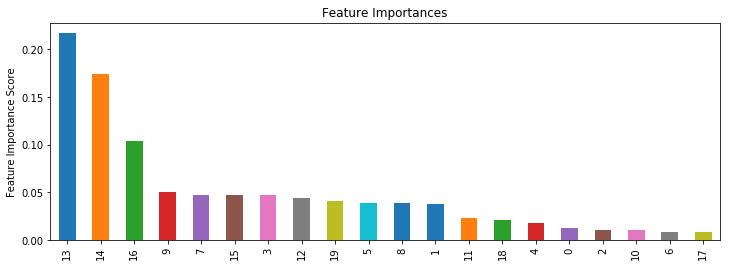

In [34]:

feat_imp = pd.Series(clf_xgb.feature_importances_).sort_values(ascending=False)
feat_imp.plot(kind='bar', title='Feature Importances')
plt.ylabel('Feature Importance Score')

In [35]:
y_val_pred_2_proba=pd.DataFrame(clf_xgb.predict_proba(X_val))[1].values
y_prob_test=pd.DataFrame(clf_xgb.predict_proba(test[cols_X]))[1].values
dfSub=generate_output(clf_xgb,test,y_val,y_prob_val=y_val_pred_2_proba,y_prob_test=y_prob_test,thresh=None)

0.0 0.20345907667166008 0 0.20345907667166008
0.01 0.4135442686650014 1 0.4135442686650014
0.02 0.46467817896389324 2 0.46467817896389324
0.03 0.498143773202835 3 0.498143773202835
0.04 0.5187810063784549 4 0.5187810063784549
0.05 0.5329428989751098 5 0.5329428989751098
0.06 0.551199086410354 6 0.551199086410354
0.07 0.5698456667985754 7 0.5698456667985754
0.08 0.5809601301871441 8 0.5809601301871441
0.09 0.5903413821815154 9 0.5903413821815154
0.1 0.5970149253731344 10 0.5970149253731344
0.11 0.6076721883173496 11 0.6076721883173496
0.12 0.6144256455921638 12 0.6144256455921638
0.13 0.6208466090122895 13 0.6208466090122895
0.14 0.6288899210404088 14 0.6288899210404088
0.15 0.6324705882352941 15 0.6324705882352941
0.16 0.6361031518624641 16 0.6361031518624641
0.17 0.6388754241396025 17 0.6388754241396025
0.18 0.6414538310412574 18 0.6414538310412574
0.19 0.644455494778717 19 0.644455494778717
0.2 0.6508097165991903 20 0.6508097165991903
0.21 0.6540041067761807 21 0.6540041067761807
0.2

C:\Users\girid\AppData\Roaming\Python\Python36\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


### NaiveBayes

In [36]:
X_train,X_val,y_train,y_val,test=get_model_ds(df_main,cols_X,cols_y)
#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
clf_nb = GaussianNB()
clf_nb.fit(X_train,y_train)
y_val_pred_2_proba=pd.DataFrame(clf_nb.predict_proba(X_val))[1].values
y_prob_test=pd.DataFrame(clf_nb.predict_proba(test[cols_X]))[1].values
dfSub=generate_output(clf_nb,test,y_val,y_prob_val=y_val_pred_2_proba,y_prob_test=y_prob_test,thresh=None)

C:\Users\girid\AppData\Roaming\Python\Python36\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.0 0.20345907667166008 0 0.20345907667166008
0.01 0.4053700065487884 1 0.4053700065487884
0.02 0.40229497131285863 1 0.4053700065487884
0.03 0.39986211651154774 1 0.4053700065487884
0.04 0.40236686390532544 1 0.4053700065487884
0.05 0.4022464022464022 1 0.4053700065487884
0.06 0.40555951532430506 6 0.40555951532430506
0.07 0.4114867320974192 7 0.4114867320974192
0.08 0.4204248975027953 8 0.4204248975027953
0.09 0.4271548436308162 9 0.4271548436308162
0.1 0.43270735524256654 10 0.43270735524256654
0.11 0.4419535628502802 11 0.4419535628502802
0.12 0.45026606631191163 12 0.45026606631191163
0.13 0.4512905911740217 13 0.4512905911740217
0.14 0.456973293768546 14 0.456973293768546
0.15 0.45883361921097765 15 0.45883361921097765
0.16 0.45873153779322323 15 0.45883361921097765
0.17 0.46059004843681206 17 0.46059004843681206
0.18 0.4584450402144772 17 0.46059004843681206
0.19 0.4609127880704926 19 0.4609127880704926
0.2 0.461749885478699 20 0.461749885478699
0.21 0.46296296296296297 21 0.462

### Adaboost

In [37]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

In [38]:
X_train,X_val,y_train,y_val,test=get_model_ds(df_main,cols_X,cols_y)
dtc = DecisionTreeClassifier(criterion="entropy", max_depth=50)
clf_ada=AdaBoostClassifier(base_estimator=dtc, n_estimators=2000,learning_rate=0.001)
clf_ada.fit(X_train,y_train)
y_val_pred_2_proba=pd.DataFrame(clf_ada.predict_proba(X_val))[1].values
y_prob_test=pd.DataFrame(clf_ada.predict_proba(test[cols_X]))[1].values
dfSub=generate_output(clf_ada,test,y_val,y_prob_val=y_val_pred_2_proba,y_prob_test=y_prob_test,thresh=None)

C:\Users\girid\AppData\Roaming\Python\Python36\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.0 0.20345907667166008 0 0.20345907667166008
0.01 0.525101763907734 1 0.525101763907734
0.02 0.525101763907734 1 0.525101763907734
0.03 0.525101763907734 1 0.525101763907734
0.04 0.525101763907734 1 0.525101763907734
0.05 0.525101763907734 1 0.525101763907734
0.06 0.525101763907734 1 0.525101763907734
0.07 0.525101763907734 1 0.525101763907734
0.08 0.525101763907734 1 0.525101763907734
0.09 0.525101763907734 1 0.525101763907734
0.1 0.525101763907734 1 0.525101763907734
0.11 0.525101763907734 1 0.525101763907734
0.12 0.525101763907734 1 0.525101763907734
0.13 0.525101763907734 1 0.525101763907734
0.14 0.525101763907734 1 0.525101763907734
0.15 0.525101763907734 1 0.525101763907734
0.16 0.525101763907734 1 0.525101763907734
0.17 0.525101763907734 1 0.525101763907734
0.18 0.525101763907734 1 0.525101763907734
0.19 0.525101763907734 1 0.525101763907734
0.2 0.525101763907734 1 0.525101763907734
0.21 0.525101763907734 1 0.525101763907734
0.22 0.525101763907734 1 0.525101763907734
0.23 0.525

In [39]:
X_train,X_val,y_train,y_val,test=get_model_ds(df_main,cols_X,cols_y)
from sklearn.ensemble import IsolationForest
clf_iso = IsolationForest(random_state=0,n_estimators=5000,max_features=0.8)
clf_iso.fit(X_train,y_train)
y_val_pred_2_proba=clf_iso.predict(X_val)
y_prob_test=clf_iso.predict(test[cols_X])
dfSub=generate_output(clf_iso,test,y_val,y_prob_val=y_val_pred_2_proba,y_prob_test=y_prob_test,thresh=None)

C:\Users\girid\AppData\Roaming\Python\Python36\site-packages\sklearn\ensemble\iforest.py:237: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)
C:\Users\girid\AppData\Roaming\Python\Python36\site-packages\sklearn\ensemble\iforest.py:247: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.22. Please use behaviour="new", which makes the decision_function change to match other anomaly detection algorithm API.
  FutureWarning)
C:\Users\girid\AppData\Roaming\Python\Python36\site-packages\sklearn\ensemble\iforest.py:415: DeprecationWarning: threshold_ attribute is deprecated in 0.20 and will be removed in 0.22.
  " be removed in 0.22.", DeprecationWarning)
C:\Users\girid\AppData\Roaming\Python\Python36\site-packages\sklearn\ensemble\iforest.py:415: DeprecationWarning: threshold_ attribute is deprecated in 0.20 and will be removed in 0.22.
  " be removed in 0.22.",

0.0 0.1468218442256043 0 0.1468218442256043
0.01 0.1468218442256043 0 0.1468218442256043
0.02 0.1468218442256043 0 0.1468218442256043
0.03 0.1468218442256043 0 0.1468218442256043
0.04 0.1468218442256043 0 0.1468218442256043
0.05 0.1468218442256043 0 0.1468218442256043
0.06 0.1468218442256043 0 0.1468218442256043
0.07 0.1468218442256043 0 0.1468218442256043
0.08 0.1468218442256043 0 0.1468218442256043
0.09 0.1468218442256043 0 0.1468218442256043
0.1 0.1468218442256043 0 0.1468218442256043
0.11 0.1468218442256043 0 0.1468218442256043
0.12 0.1468218442256043 0 0.1468218442256043
0.13 0.1468218442256043 0 0.1468218442256043
0.14 0.1468218442256043 0 0.1468218442256043
0.15 0.1468218442256043 0 0.1468218442256043
0.16 0.1468218442256043 0 0.1468218442256043
0.17 0.1468218442256043 0 0.1468218442256043
0.18 0.1468218442256043 0 0.1468218442256043
0.19 0.1468218442256043 0 0.1468218442256043
0.2 0.1468218442256043 0 0.1468218442256043
0.21 0.1468218442256043 0 0.1468218442256043
0.22 0.146821

### Ensemble cb, lgb and xgb

In [43]:

df_main['pred_proba_ada']=pd.DataFrame(clf_ada.predict_proba(df_main[cols_X]))[1].values
df_main['pred_proba_xg']=pd.DataFrame(clf_xgb.predict_proba(df_main[cols_X]))[1].values
df_main['pred_proba_lg']=clf_lgb2.predict(df_main[cols_X])
df_main['pred_proba_cb']=pd.DataFrame(clf_cb.predict_proba(df_main[cols_X]))[1].values
df_main['pred_proba_rf']=pd.DataFrame(clf_rfc.predict_proba(df_main[cols_X]))[1].values
df_main['pred_proba_nb']=pd.DataFrame(clf_nb.predict_proba(df_main[cols_X]))[1].values
df_main['pred_proba_iso']=clf_iso.predict(df_main[cols_X])

cols_en=['pred_proba_xg','pred_proba_lg','pred_proba_cb','pred_proba_rf','pred_proba_nb','pred_proba_ada']
df_main['pred_proba_total']=df_main[cols_en].sum(axis=1)
cols_en=['pred_proba_xg','pred_proba_lg','pred_proba_cb','pred_proba_rf','pred_proba_nb','pred_proba_ada','pred_proba_iso','pred_proba_total']
cols_X_en=cols_X+cols_en

C:\Users\girid\AppData\Roaming\Python\Python36\site-packages\sklearn\ensemble\iforest.py:415: DeprecationWarning: threshold_ attribute is deprecated in 0.20 and will be removed in 0.22.
  " be removed in 0.22.", DeprecationWarning)


In [45]:
cols_en

['pred_proba_xg',
 'pred_proba_lg',
 'pred_proba_cb',
 'pred_proba_rf',
 'pred_proba_nb',
 'pred_proba_ada',
 'pred_proba_iso',
 'pred_proba_total']

In [46]:
X_train,X_val,y_train,y_val,test=get_model_ds(df_main,cols_X_en,cols_y,0.2)

In [47]:
# making lgbm datasets for train and valid
train_data = lgb.Dataset(X_train,label=y_train)
valid_data = lgb.Dataset(X_val, label=y_val)
from sklearn.metrics import f1_score

def lgb_f1_score(y_hat, data):
    y_true = data.get_label()
    y_hat = np.round(y_hat) # scikits f1 doesn't like probabilities
    return 'f1', f1_score(y_true, y_hat), True

evals_result = {}
params = {
    'objective' :'binary',
    'learning_rate' : 0.001,
    'num_leaves' : 12,
    'feature_fraction': 0.8, 
    'bagging_fraction': 0.8, 
    'bagging_freq':1,
    'boosting_type' :'gbdt',
    'metric': ['binary_logloss','auc']
}
clf_lgb3=lgb.train(params, train_data, 25000, valid_sets=[valid_data,train_data],categorical_feature=cols_cat_idx,
                  verbose_eval=100, early_stopping_rounds=800, evals_result=evals_result)

C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is [0, 2, 4, 5, 6, 7, 8, 10, 11, 15, 17, 18, 19]
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))
C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\basic.py:762: UserWarning: categorical_feature in param dict is overridden.
  warnings.warn('categorical_feature in param dict is overridden.')


Training until validation scores don't improve for 800 rounds.
[100]	training's binary_logloss: 0.290647	training's auc: 0.995736	valid_0's binary_logloss: 0.290449	valid_0's auc: 0.995217
[200]	training's binary_logloss: 0.249613	training's auc: 0.995997	valid_0's binary_logloss: 0.249491	valid_0's auc: 0.995484
[300]	training's binary_logloss: 0.219357	training's auc: 0.996127	valid_0's binary_logloss: 0.219322	valid_0's auc: 0.995576
[400]	training's binary_logloss: 0.195427	training's auc: 0.996181	valid_0's binary_logloss: 0.195457	valid_0's auc: 0.996212
[500]	training's binary_logloss: 0.175932	training's auc: 0.996238	valid_0's binary_logloss: 0.176037	valid_0's auc: 0.996262
[600]	training's binary_logloss: 0.15984	training's auc: 0.996411	valid_0's binary_logloss: 0.160033	valid_0's auc: 0.996233
[700]	training's binary_logloss: 0.146058	training's auc: 0.99646	valid_0's binary_logloss: 0.146321	valid_0's auc: 0.996275
[800]	training's binary_logloss: 0.13417	training's auc: 

[6500]	training's binary_logloss: 0.035127	training's auc: 0.998319	valid_0's binary_logloss: 0.0412576	valid_0's auc: 0.996992
[6600]	training's binary_logloss: 0.0349202	training's auc: 0.998342	valid_0's binary_logloss: 0.0411919	valid_0's auc: 0.996998
[6700]	training's binary_logloss: 0.0347142	training's auc: 0.998364	valid_0's binary_logloss: 0.0411307	valid_0's auc: 0.997003
[6800]	training's binary_logloss: 0.0345172	training's auc: 0.998384	valid_0's binary_logloss: 0.0410636	valid_0's auc: 0.997007
[6900]	training's binary_logloss: 0.0343223	training's auc: 0.998406	valid_0's binary_logloss: 0.0410012	valid_0's auc: 0.997014
[7000]	training's binary_logloss: 0.034121	training's auc: 0.998429	valid_0's binary_logloss: 0.0409393	valid_0's auc: 0.997015
[7100]	training's binary_logloss: 0.0339277	training's auc: 0.99845	valid_0's binary_logloss: 0.0408927	valid_0's auc: 0.997016
[7200]	training's binary_logloss: 0.0337346	training's auc: 0.998471	valid_0's binary_logloss: 0.040

[12900]	training's binary_logloss: 0.0254026	training's auc: 0.999284	valid_0's binary_logloss: 0.0395698	valid_0's auc: 0.997122
[13000]	training's binary_logloss: 0.025291	training's auc: 0.999293	valid_0's binary_logloss: 0.0395571	valid_0's auc: 0.997122
[13100]	training's binary_logloss: 0.0251766	training's auc: 0.999302	valid_0's binary_logloss: 0.0395446	valid_0's auc: 0.997123
[13200]	training's binary_logloss: 0.0250628	training's auc: 0.999311	valid_0's binary_logloss: 0.039535	valid_0's auc: 0.997124
[13300]	training's binary_logloss: 0.0249499	training's auc: 0.99932	valid_0's binary_logloss: 0.0395338	valid_0's auc: 0.997126
[13400]	training's binary_logloss: 0.0248369	training's auc: 0.999328	valid_0's binary_logloss: 0.0395222	valid_0's auc: 0.997126
[13500]	training's binary_logloss: 0.0247238	training's auc: 0.999337	valid_0's binary_logloss: 0.0395076	valid_0's auc: 0.997126
[13600]	training's binary_logloss: 0.024614	training's auc: 0.999345	valid_0's binary_logloss

In [48]:
y_val_pred_2_proba=clf_lgb3.predict(X_val)
y_prob_test=clf_lgb3.predict(test[cols_X_en])
dfSub=generate_output(clf_lgb3,test,y_val,y_prob_val=y_val_pred_2_proba,y_prob_test=y_prob_test,thresh=None)

0.0 0.20345907667166008 0 0.20345907667166008
0.01 0.7427427427427429 1 0.7427427427427429
0.02 0.805449591280654 2 0.805449591280654
0.03 0.8364459535936616 3 0.8364459535936616
0.04 0.8548293811451707 4 0.8548293811451707
0.05 0.8694117647058824 5 0.8694117647058824
0.06 0.8794749403341289 6 0.8794749403341289
0.07 0.8915808600847971 7 0.8915808600847971
0.08 0.8981086028065896 8 0.8981086028065896
0.09 0.9047326367547633 9 0.9047326367547633
0.1 0.9080814312152992 10 0.9080814312152992
0.11 0.9120198265179679 11 0.9120198265179679
0.12 0.9164588528678304 12 0.9164588528678304
0.13 0.9198998748435544 13 0.9198998748435544
0.14 0.9215317011927181 14 0.9215317011927181
0.15 0.924433249370277 15 0.924433249370277
0.16 0.9261829652996846 16 0.9261829652996846
0.17 0.9266750948166876 17 0.9266750948166876
0.18 0.9296131896005073 18 0.9296131896005073
0.19 0.9312977099236641 19 0.9312977099236641
0.2 0.9318905155951623 20 0.9318905155951623
0.21 0.9336734693877551 21 0.9336734693877551
0.2

In [49]:
#valid_0's binary_logloss: 0.0493133, 0.9229738780977896,0.9182334936598164
#valid_0's binary_logloss: 0.0501237

In [50]:
X_train.columns

Index(['previous', 'emp.var.rate', 'housing', 'cons.price.idx', 'contact',
       'day_of_week', 'default', 'month', 'pdays', 'campaign', 'marital',
       'nr.employed', 'cons.conf.idx', 'duration', 'euribor3m', 'job', 'age',
       'loan', 'poutcome', 'education', 'pred_proba_xg', 'pred_proba_lg',
       'pred_proba_cb', 'pred_proba_rf', 'pred_proba_nb', 'pred_proba_ada',
       'pred_proba_iso', 'pred_proba_total'],
      dtype='object')

In [51]:
np.unique(y_train)

array([0, 1])

In [52]:
clf_nb.predict_proba(X_val)


ValueError: operands could not be broadcast together with shapes (6596,28) (20,) 

In [ ]:
###